In [1]:
import obspy
import sys
sys.path.append('/home/ak287/seisbench/seisbench/models')
import seisbench.models as sbm
from obspy.clients.fdsn import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#model1 = sbm.QuakeXNetoneD.from_pretrained("base")
model2 = sbm.SeismicCNN.from_pretrained("base")

In [3]:
su_cat = pd.read_csv('../../data/event_catalogs_for_testing/surface_events_for_testing.csv')
su_cat.head(10)

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID,empty
0,2023/06/01,18:01:32.01,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61929751,NaN
1,2023/06/01,18:39:58.07,46.87080,-121.73230,-2.877,-5.0,Mh,0,0,0,0.00,UW,61929771,NaN
2,2023/06/01,22:16:18.26,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61929851,NaN
3,2023/06/03,05:11:55.95,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61930241,NaN
4,2023/06/04,02:36:58.75,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61930391,NaN
5,2023/06/05,06:37:01.29,45.35860,-121.70550,-2.590,-5.0,Mh,0,0,0,0.00,UW,61930566,NaN
6,2023/06/06,04:41:35.30,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61930836,NaN
7,2023/06/06,09:12:18.56,48.75483,-121.83933,-0.500,1.1,ML,6,99,16,0.21,UW,61930856,NaN
8,2023/06/07,03:52:59.25,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61931126,NaN
9,2023/06/07,05:24:16.48,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61931136,NaN


In [37]:
client = Client('IRIS')
station = 'STAR'
network = 'UW'
channel = 'EH'
location = '*'
starttime = obspy.UTCDateTime(2023, 6, 1, 18, 39, 58)
# Download waveform
stream = client.get_waveforms(
            network=network,
            station=station,
            location=location,
            channel=f"{channel}?",
            starttime=starttime - 100,
            endtime=starttime + 100
        )

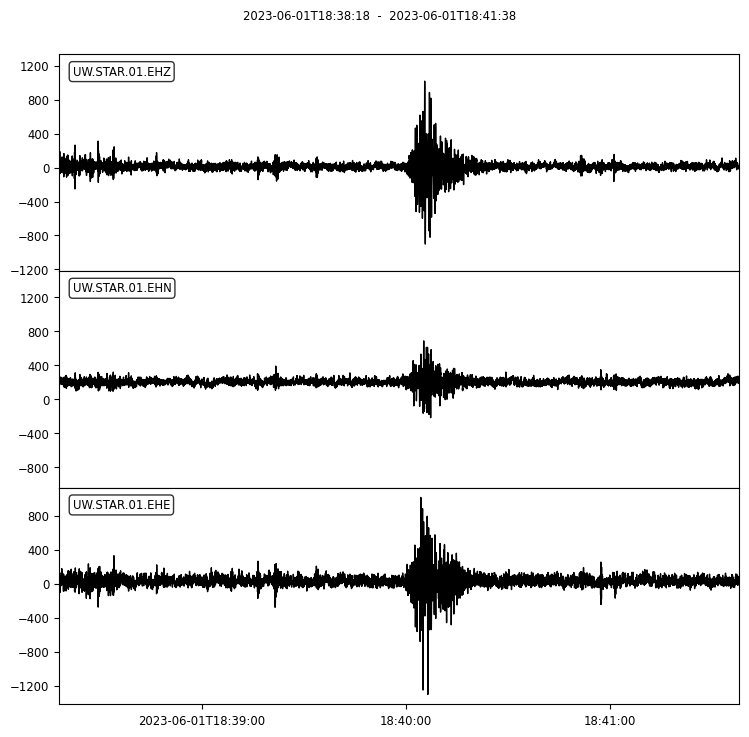

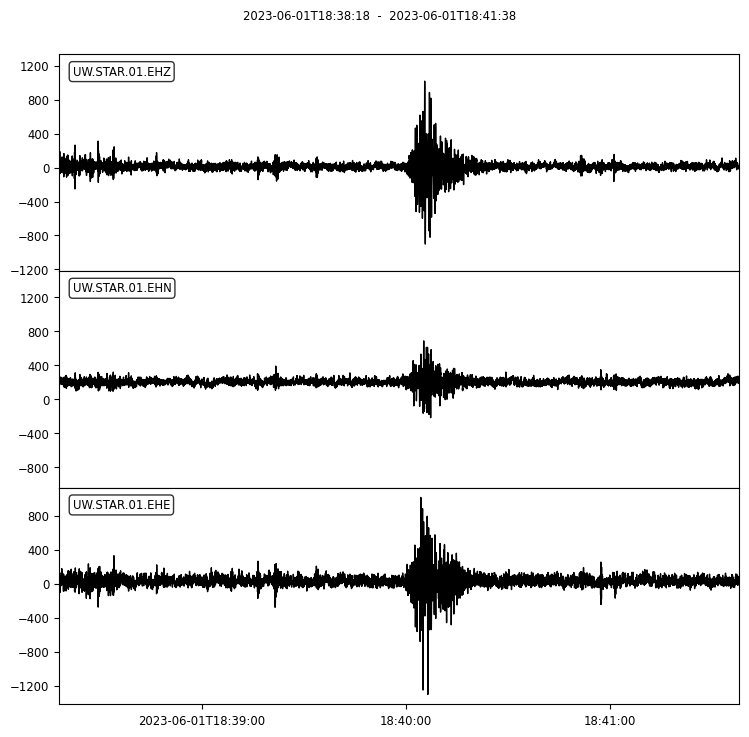

In [38]:
stream.plot()

In [39]:
probs_a = np.array(model2.annotate(stream)).T

In [40]:
probs_a

array([[1.7990221e-01, 5.3443841e-06, 8.2007354e-01, 1.8885934e-05],
       [2.8291645e-03, 1.9629143e-01, 2.0810401e-02, 7.8006905e-01],
       [6.5263092e-05, 3.1172261e-02, 1.4649706e-01, 8.2226545e-01]],
      dtype=float32)

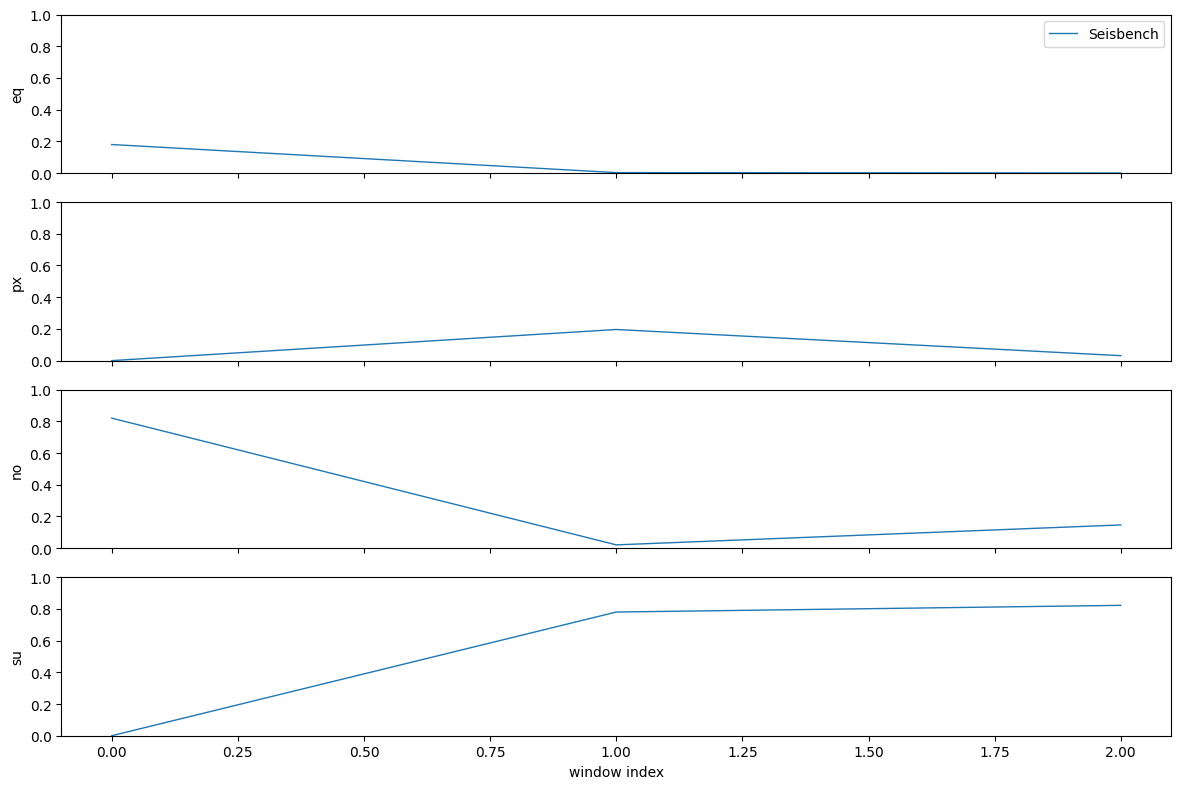

In [41]:
time = np.arange(len(probs_a))    # one tick per window
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

class_names = ["eq", "px", "no", "su"]
for k in range(4):
    ax[k].plot(time, probs_a[:, k], label="Seisbench", lw=1)
    ax[k].set_ylabel(class_names[k])
    ax[k].set_ylim(0, 1)
ax[-1].set_xlabel("window index")
ax[0].legend(loc="upper right")
plt.tight_layout()
plt.show()
